# Notebook 7 - Deep Learning

In [1]:
################################## MODIFY PATHS TO RUN THE NOTEBOOK #########################################
data_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/data/'
code_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/code/'
##############################################################################################################

# mount drive:
from google.colab import drive
drive.mount('/content/drive')

# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sk:
from sklearn.metrics import mean_squared_error, r2_score

# keras:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1, l2, l1_l2
from keras.utils import set_random_seed

# utilities:
from copy import deepcopy
from itertools import product
import pickle

# import custom functions:
import sys
sys.path.append(code_folder)
from ml_final_project_functions import scale_numeric_and_tfidf, plot_predictions, generate_params, build_model, grid_search_keras, cross_validate_best_model, find_optimal_epochs

################################################################################
# Extract data:

# unpack original data pkl - v1:
with open(data_folder + 'processed_data_v1.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v1, X_val_v1, X_test_v1  = data['X_train'], data['X_val'], data['X_test']
y_train, y_val, y_test = data['y_train'], data['y_val'], data['y_test']

# unpack original data + pca columns pkl - v5:
with open(data_folder + 'processed_data_v5.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v5, X_val_v5, X_test_v5  = data['X_train'], data['X_val'], data['X_test']

# set random seed for keras:
set_random_seed(42)

Mounted at /content/drive


Data v1

Fitting 36 hyperparameter combinations
315/315 [==============================] - 1s 2ms/step
Iteration number 5
315/315 [==============================] - 1s 2ms/step
Iteration number 10
315/315 [==============================] - 1s 2ms/step
Iteration number 15
315/315 [==============================] - 1s 2ms/step
Iteration number 20
315/315 [==============================] - 1s 3ms/step
Iteration number 25
315/315 [==============================] - 1s 2ms/step
Iteration number 30
315/315 [==============================] - 1s 2ms/step
Iteration number 35
315/315 [==============================] - 1s 3ms/step


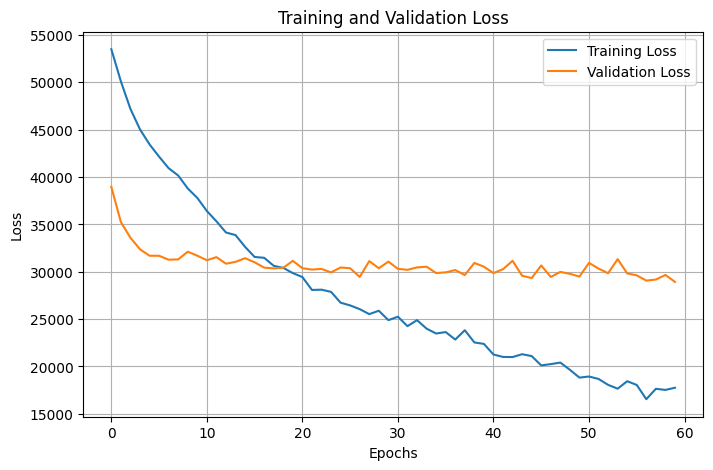


best mse is 28931.01
best params:
 {'layers': 3, 'units': [256, 128, 128], 'regs': [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)], 'dropout_rates': [0.2, 0.2, 0.2], 'batch_norms': [False, True, False], 'learning_rate': 0.0001, 'input_dim': 3498}


In [ ]:
param_grid =  {'layers': [3],
              'units': [[128, 128, 128] , [256, 128, 128]],
               'regs': [[(0.00, 0.00), (0.00, 0.00),(0.00, 0.00)]],
               'dropout_rates': [[0.2, 0.2, 0.2], [0.1, 0.1, 0.1], [0.3, 0.2, 0.3]],
               'batch_norms': [[False, True, False], [True, True, True]],
               'learning_rate': [0.0001, 0.001, 0.1],
               'batch_size': [32],
               'epochs' : [60],
               'input_dim': X_train_v1.shape[1]
               }

# convert to float32:
X_train = np.asarray(X_train_v1).astype('float32')
X_val = np.asarray(X_val_v1).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')

# run grid:
results, best_model = grid_search_keras(param_grid, build_model, X_train, y_train, X_val, y_val, verbose=5)

68/68 [==============================] - 0s 1ms/step


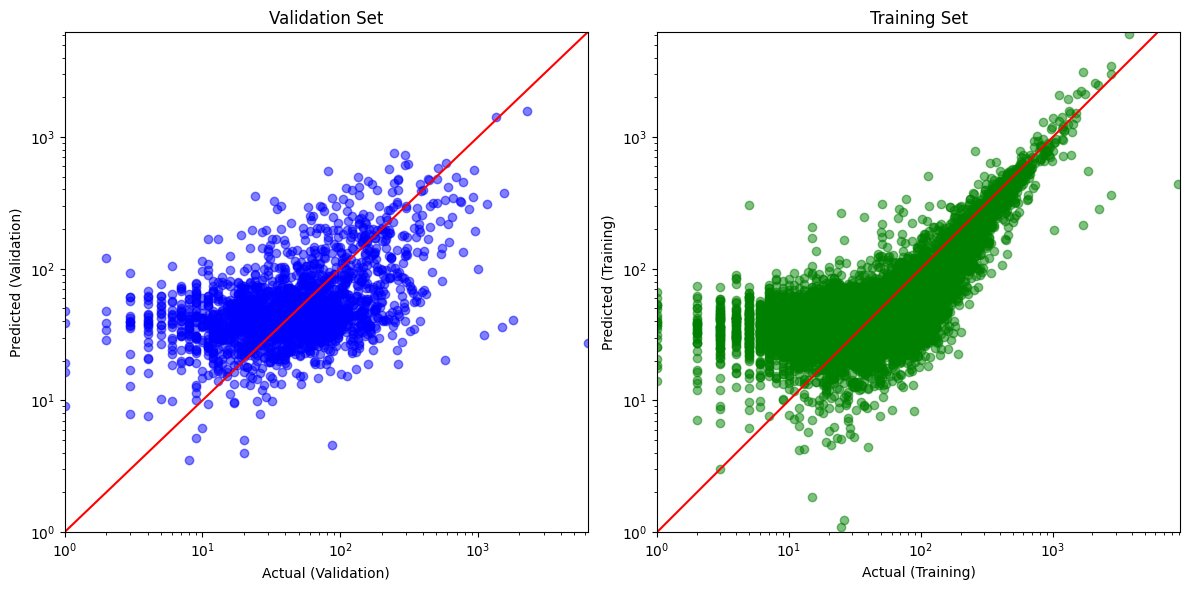

In [ ]:
# plot results:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
plot_predictions(y_train, y_train_pred, y_val, y_val_pred)

In [ ]:
# inspect results:
results.head()

,params,mse train,mse val,r2 val,r2 train
18,"{'layers': 3, 'units': [256, 128, 128], 'regs'...",39112.496094,29263.300781,0.155007,0.173656
19,"{'layers': 3, 'units': [256, 128, 128], 'regs'...",148967.625000,29283.000000,0.154438,-2.147294
13,"{'layers': 3, 'units': [128, 128, 128], 'regs'...",335024.625000,29898.083984,0.136677,-6.078191
30,"{'layers': 3, 'units': [256, 128, 128], 'regs'...",25261.742188,30171.486328,0.128783,0.466286
7,"{'layers': 3, 'units': [128, 128, 128], 'regs'...",520030.843750,30412.355469,0.121828,-9.986884


In [ ]:
# best model summary:
best_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 256)               895744    
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout_60 (Dropout)        (None, 256)               0         
                                                                 
 dense_81 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 128)               0         
                                                                 
 batch_normalization_38 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                     

Data V5 - all data + PCA

Fitting 10 hyperparameter combinations
315/315 [==============================] - 1s 2ms/step
Iteration number 5
315/315 [==============================] - 1s 2ms/step
Iteration number 10
315/315 [==============================] - 1s 2ms/step


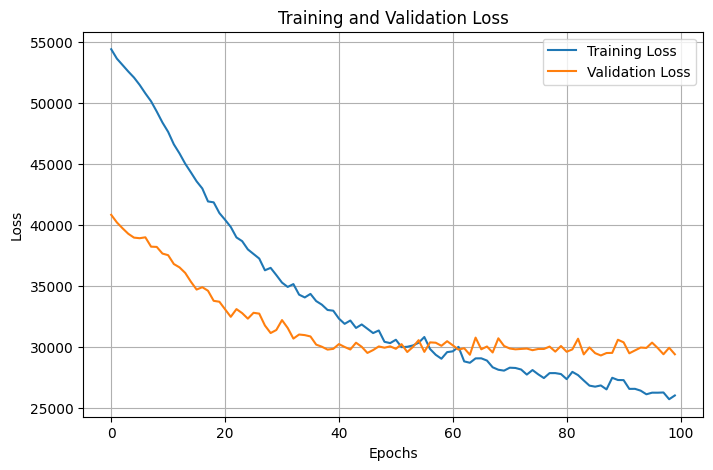


best mse is 29405.81
best params:
 {'layers': 3, 'units': [256, 256, 256], 'regs': [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)], 'dropout_rates': [0.35, 0.35, 0.35], 'batch_norms': [True, False, True], 'learning_rate': 0.0001, 'input_dim': 3517}
68/68 [==============================] - 0s 2ms/step


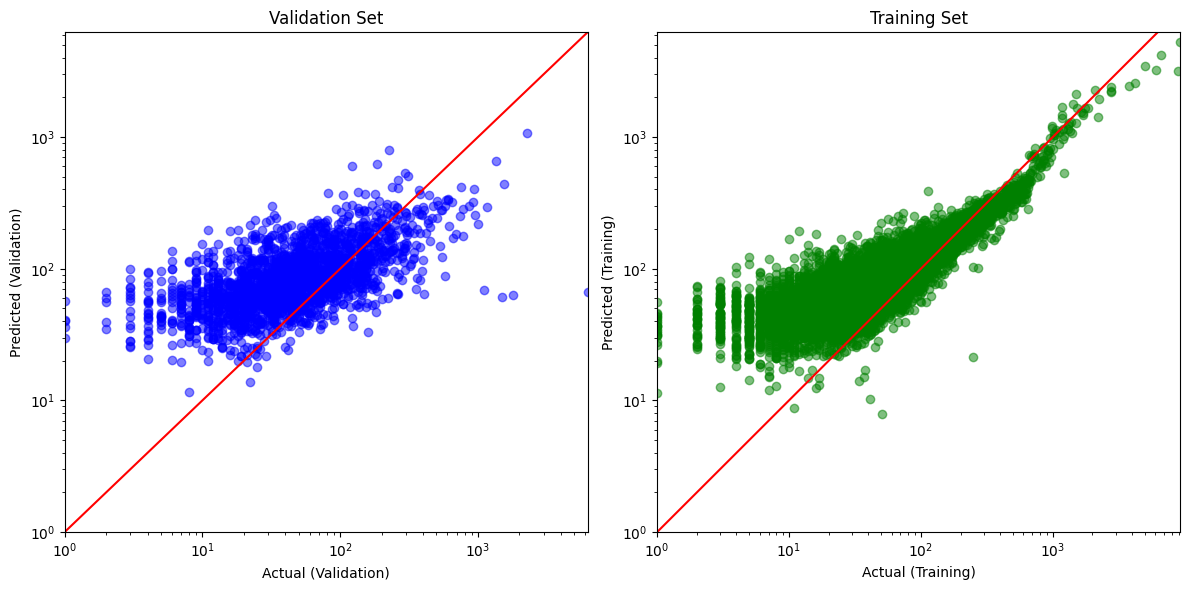

In [ ]:
## 3 layer network ##

param_grid =  {'layers': [1,2,3],
              'units':   [[256],
                         [256, 256],
                         [256, 256, 256]],
               'regs': [[(0,0), (0.1, 0.1)],
                        [(0,0), (0,0)],
                        [(0.0, 0.00), (0.0, 0.00),(0.0, 0.00)], [(0.01, 0.01), (0.1, 0.01),(0.01, 0.01)]],
               'dropout_rates': [[0.3],
                                 [0.35, 0.35],
                                 [0.35, 0.35, 0.35], [0.2, 0.2, 0.2]],
               'batch_norms': [[True],
                               [True, True],
                               [True, False, True], [True, True, True]],
               'learning_rate': [0.0001],
               'batch_size': [64],
               'epochs' : [100],
               'input_dim': X_train_v5.shape[1]
               }

# convert to float32:
X_train = np.asarray(X_train_v5).astype('float32')
X_val = np.asarray(X_val_v5).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')

# run grid:
results, best_model_v5 = grid_search_keras(param_grid, build_model, X_train, y_train, X_val, y_val, verbose=5)

# plot results:
y_train_pred = best_model_v5.predict(X_train)
y_val_pred = best_model_v5.predict(X_val)
plot_predictions(y_train, y_train_pred, y_val, y_val_pred)

In [ ]:
results.head()

,params,mse train,mse val,r2 val,r2 train
2,"{'layers': 3, 'units': [256, 256, 256], 'regs'...",9218.599609,29405.810547,0.150892,0.805235
5,"{'layers': 3, 'units': [256, 256, 256], 'regs'...",10235.809570,29847.857422,0.138128,0.783744
6,"{'layers': 3, 'units': [256, 256, 256], 'regs'...",8312.819336,29965.962891,0.150978,0.836269
9,"{'layers': 3, 'units': [256, 256, 256], 'regs'...",11545.964844,30086.351562,0.146971,0.767574
4,"{'layers': 3, 'units': [256, 256, 256], 'regs'...",6057.051758,30086.515625,0.131236,0.872030


Optimal number of epochs: 218
Epoch 1/218
191/191 [==============================] - 3s 5ms/step - loss: 51923.1562 - mse: 51923.1562
Epoch 2/218
191/191 [==============================] - 1s 5ms/step - loss: 51060.9141 - mse: 51060.9141
Epoch 3/218
191/191 [==============================] - 1s 5ms/step - loss: 50522.0312 - mse: 50522.0312
Epoch 4/218
191/191 [==============================] - 1s 5ms/step - loss: 49931.3633 - mse: 49931.3633
Epoch 5/218
191/191 [==============================] - 1s 5ms/step - loss: 49296.1328 - mse: 49296.1328
Epoch 6/218
191/191 [==============================] - 1s 5ms/step - loss: 48536.5430 - mse: 48536.5430
Epoch 7/218
191/191 [==============================] - 1s 5ms/step - loss: 47911.9258 - mse: 47911.9258
Epoch 8/218
191/191 [==============================] - 1s 5ms/step - loss: 46919.1133 - mse: 46919.1133
Epoch 9/218
191/191 [==============================] - 1s 5ms/step - loss: 45974.3320 - mse: 45974.3320
Epoch 10/218
191/191 [============

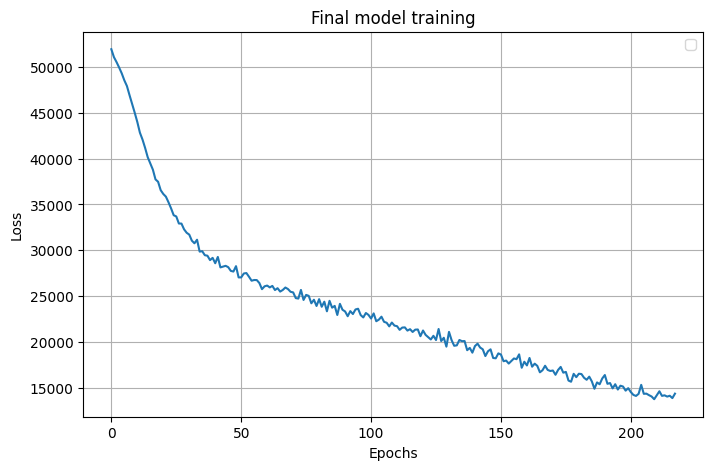

In [ ]:
# build a model with the best params:
best_params = results.iloc[0]['params']
final_model = build_model(**best_params)

# join train and val sets:
X_train_final = np.concatenate((X_train, X_val))
y_train_final = np.concatenate((y_train, y_val))

# we need to find the optimal number of epochs for final training.
# we'll use cross validation, and calculate the mean loss achieved at each epoch.
# we'll choose the epoch where the mean loss achieved is minimal.
# these functions are defined in the py file.

# cross validation:
all_history = cross_validate_best_model(X_train_final, y_train_final, best_params, k=5)

# Find the optimal number of epochs
optimal_epochs = find_optimal_epochs(all_history)
print(f'Optimal number of epochs: {optimal_epochs}')


# now fit the final final model (finally!)
final_history = final_model.fit(X_train_final, y_train_final,
                                epochs=optimal_epochs,
                                batch_size=64,
                                verbose=1)

# plot final training process:
plt.figure(figsize=(8, 5))
plt.plot(final_history.history['loss'])
plt.title('Final model training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

382/382 [==============================] - 1s 2ms/step
train + val MSE:  34388.54
train + val R2:  0.2374372556148847


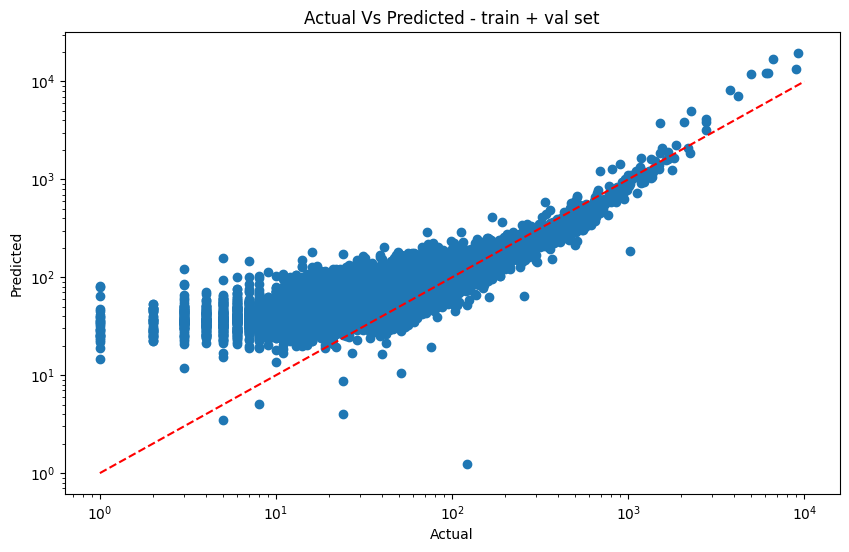

In [ ]:
# plot the result for all train data:
y_train_final_pred = final_model.predict(X_train_final)
print('train + val MSE: ', mean_squared_error(y_train_final, y_train_final_pred))
print('train + val R2: ', r2_score(y_train_final, y_train_final_pred))

# plot:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_final, y_train_final_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted - train + val set')
plt.xscale('log')
plt.yscale('log')
plt.plot([1, 1e4], [1, 1e4], 'r--')
plt.show()

Best Model - test on test set

68/68 [==============================] - 0s 2ms/step
test MSE:  16368.295
test R2:  0.23201140792124297


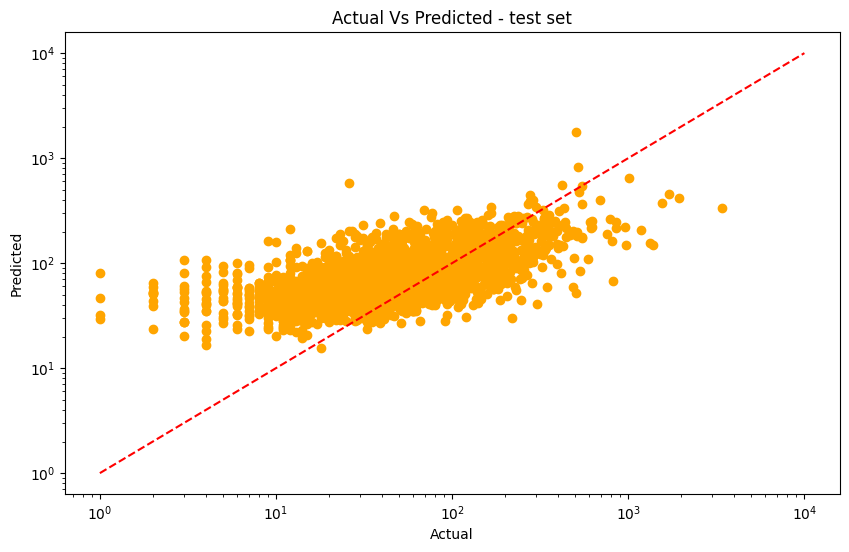

In [ ]:
# convert to float32:
X_test = np.asarray(X_test_v5).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# predict:
y_test_pred = final_model.predict(X_test)

# evaluate:
print('test MSE: ', mean_squared_error(y_test, y_test_pred))
print('test R2: ', r2_score(y_test, y_test_pred))

# plot:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted - test set')
plt.xscale('log')
plt.yscale('log')
plt.plot([1, 1e4], [1, 1e4], 'r--')
plt.show()

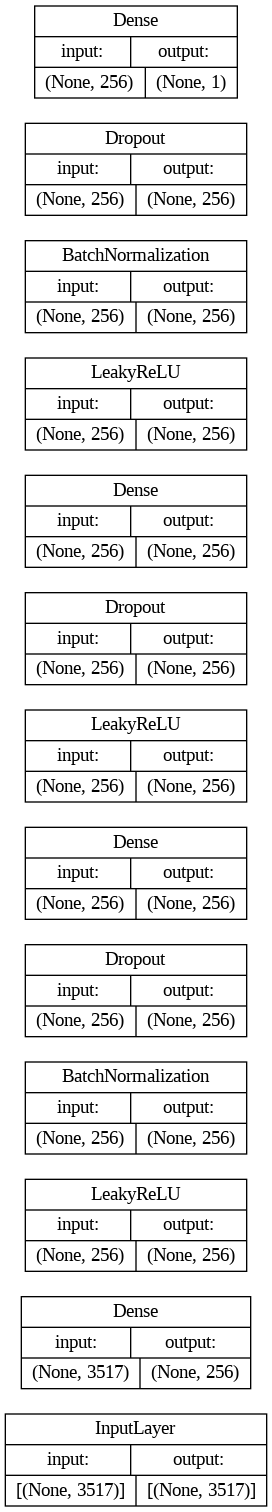

In [ ]:
# save the layer names propperly:
from keras.utils import plot_model

final_model.layers[0]._name = 'fc1'
final_model.layers[1]._name = 'leaky_ReLU1'
final_model.layers[2]._name = 'batch_norm1'
final_model.layers[3]._name = 'dropout_1'
final_model.layers[4]._name = 'fc2'
final_model.layers[5]._name = 'leaky_ReLU2'
final_model.layers[6]._name = 'dropout_2'
final_model.layers[7]._name = 'fc3'
final_model.layers[8]._name = 'leaky_ReLU3'
final_model.layers[9]._name = 'batch_norm3'
final_model.layers[10]._name = 'dropout_3'
final_model.layers[11]._name = 'output'

# lastly, save the model:
final_model.save(data_folder + 'final_model.keras')
# save also the weights only:
final_model.save_weights(data_folder + 'final_model_weights.h5')

# plot:
plot_model(final_model, to_file='model_plot.png',rankdir="LR", show_shapes=True, show_layer_names=False)